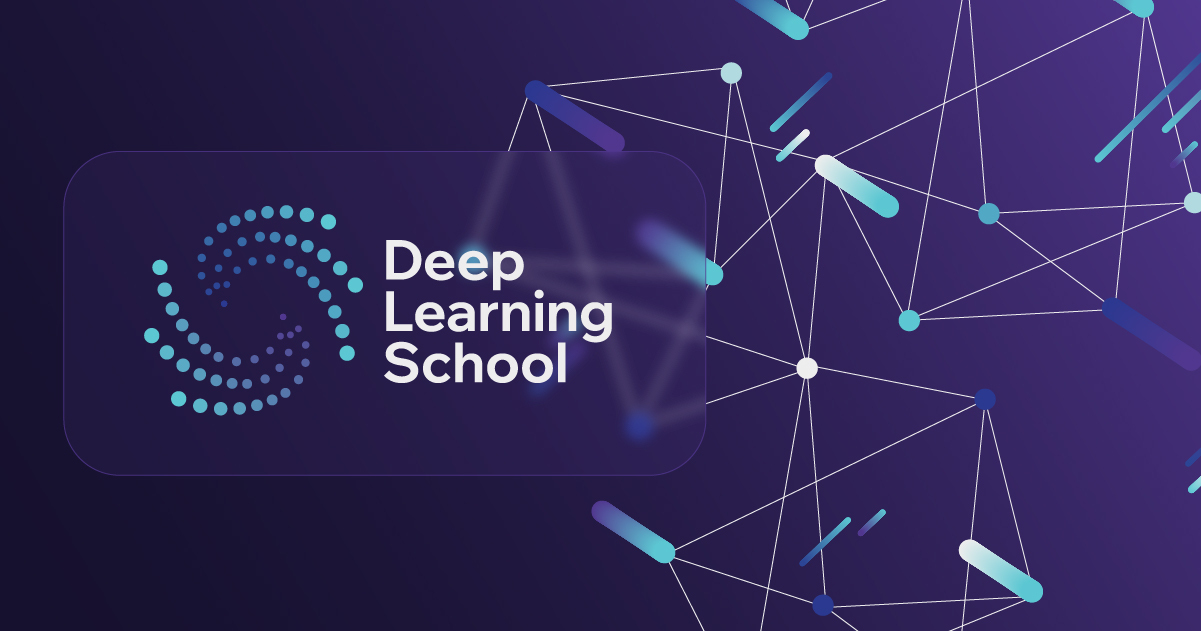

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

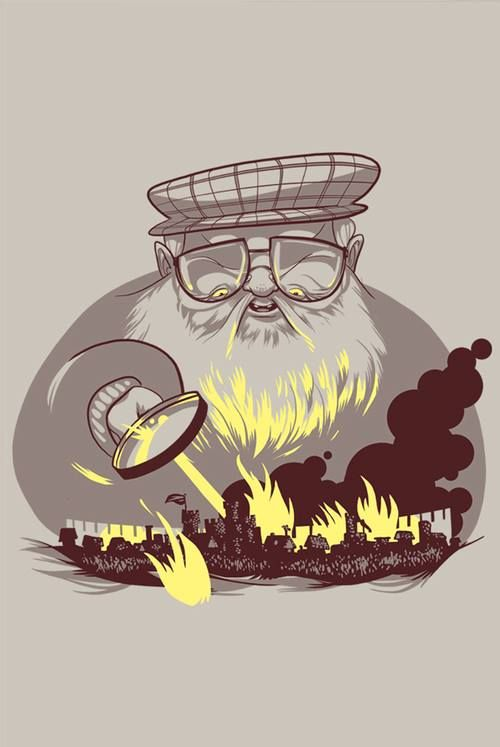

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 51.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 5.80MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [57]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")

data_first = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")

data_test = pd.read_csv("game_of_thrones_test.csv", index_col="S.No")

data_test

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100



**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<Axes: xlabel='S.No'>

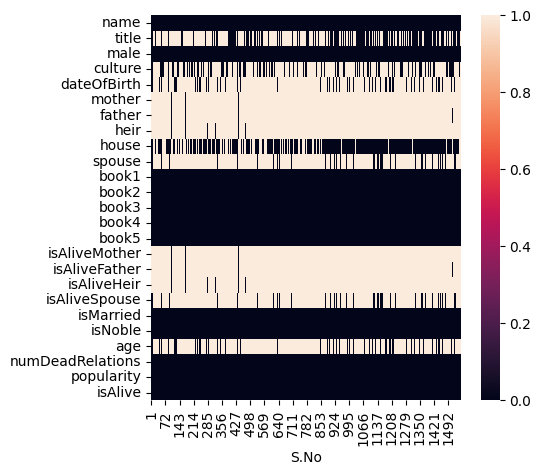

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(data_first.isna().transpose())

# plt.figure(figsize=(5,5))
# sns.heatmap(data.isna().transpose())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [59]:
data['isPopular'] = 0


for i in range(len(data)):
  if data['popularity'].iloc[i] < 0.5:
    data.iloc[i, data.columns.get_loc('isPopular')] = 0
  else:
    data.iloc[i, data.columns.get_loc('isPopular')] = 1


data_test['isPopular'] = 0


for i in range(len(data_test)):
  if data_test['popularity'].iloc[i] < 0.5:
    data_test.iloc[i, data_test.columns.get_loc('isPopular')] = 0
  else:
    data_test.iloc[i, data_test.columns.get_loc('isPopular')] = 1

In [60]:
data['boolDeadRelations'] = False

for i in range(len(data)):
  if data['numDeadRelations'].iloc[i] > 0:
    data.iloc[i, data.columns.get_loc('boolDeadRelations')] = 1
  else:
    data.iloc[i, data.columns.get_loc('boolDeadRelations')] = 0


data_test['boolDeadRelations'] = False

for i in range(len(data_test)):
  if data_test['numDeadRelations'].iloc[i] > 0:
    data_test.iloc[i, data_test.columns.get_loc('boolDeadRelations')] = 1
  else:
    data_test.iloc[i, data_test.columns.get_loc('boolDeadRelations')] = 0

C:\Users\pozoy\AppData\Local\Temp\ipykernel_20472\1947083971.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.iloc[i, data.columns.get_loc('boolDeadRelations')] = 1
C:\Users\pozoy\AppData\Local\Temp\ipykernel_20472\1947083971.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data_test.iloc[i, data_test.columns.get_loc('boolDeadRelations')] = 0


In [61]:
data_test['culture'] = data_test['culture'].replace(['summer islands', 'summer islander', 'summer isles'], 'Summer Islands')
data_test['culture'] = data_test['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'], 'Ghiscari')
data_test['culture'] = data_test['culture'].replace(["asshai'i", 'asshai'], 'Asshai')
data_test['culture'] = data_test['culture'].replace(['lysene', 'lyseni'], 'Lysene')
data_test['culture'] = data_test['culture'].replace(['andal', 'andals'],'Andal')
data_test['culture'] = data_test['culture'].replace(['braavosi', 'braavos'],'Braavosi')
data_test['culture'] = data_test['culture'].replace(['dornishmen', 'dorne', 'dornish'],'Dornish')
data_test['culture'] = data_test['culture'].replace(['myr', 'myrish', 'myrmen'],'Myrish')
data_test['culture'] = data_test['culture'].replace(['westermen', 'westerman', 'westerlands'],'Westermen')
data_test['culture'] = data_test['culture'].replace(['westeros', 'westerosi'],'Westerosi')
data_test['culture'] = data_test['culture'].replace(['stormlands', 'stormlander'],'Stormlander')
data_test['culture'] = data_test['culture'].replace(['norvos', 'norvoshi'],'Norvoshi')
data_test['culture'] = data_test['culture'].replace(['the north', 'northmen'],'Northmen')
data_test['culture'] = data_test['culture'].replace(['wildling', 'first men', 'free folk'],'Free Folk')
data_test['culture'] = data_test['culture'].replace(['qartheen', 'qarth'],'Qartheen')
data_test['culture'] = data_test['culture'].replace(['the reach', 'reach', 'reachmen'],'Reach')

cultures=['Summer Islands', 'Ghiscari', 'Asshai', 'Lysene', 'Andal', 'Braavosi',
          'Dornish', 'Myrish', 'Westermen', 'Westerosi', 'Stormlander',
          'Norvoshi', 'Northmen', 'Free Folk', 'Qartheen', 'Reach']

data['culture'] = data['culture'].where(data['culture'].isin(cultures), 'Other')


In [11]:
data['culture'] = data['culture'].replace(['summer islands', 'summer islander', 'summer isles'], 'Summer Islands')
data['culture'] = data['culture'].replace(['ghiscari', 'ghiscaricari',  'ghis'], 'Ghiscari')
data['culture'] = data['culture'].replace(["asshai'i", 'asshai'], 'Asshai')
data['culture'] = data['culture'].replace(['lysene', 'lyseni'], 'Lysene')
data['culture'] = data['culture'].replace(['andal', 'andals'],'Andal')
data['culture'] = data['culture'].replace(['braavosi', 'braavos'],'Braavosi')
data['culture'] = data['culture'].replace(['dornishmen', 'dorne', 'dornish'],'Dornish')
data['culture'] = data['culture'].replace(['myr', 'myrish', 'myrmen'],'Myrish')
data['culture'] = data['culture'].replace(['westermen', 'westerman', 'westerlands'],'Westermen')
data['culture'] = data['culture'].replace(['westeros', 'westerosi'],'Westerosi')
data['culture'] = data['culture'].replace(['stormlands', 'stormlander'],'Stormlander')
data['culture'] = data['culture'].replace(['norvos', 'norvoshi'],'Norvoshi')
data['culture'] = data['culture'].replace(['the north', 'northmen'],'Northmen')
data['culture'] = data['culture'].replace(['wildling', 'first men', 'free folk'],'Free Folk')
data['culture'] = data['culture'].replace(['qartheen', 'qarth'],'Qartheen')
data['culture'] = data['culture'].replace(['the reach', 'reach', 'reachmen'],'Reach')

cultures=['Summer Islands', 'Ghiscari', 'Asshai', 'Lysene', 'Andal', 'Braavosi',
          'Dornish', 'Myrish', 'Westermen', 'Westerosi', 'Stormlander',
          'Norvoshi', 'Northmen', 'Free Folk', 'Qartheen', 'Reach']

data_test['culture'] = data_test['culture'].where(data_test['culture'].isin(cultures), 'Other')

In [62]:
print(data['culture'].unique())

print(data_test['culture'].unique())

['Other' 'Dornish' 'Free Folk' 'Northmen' 'Braavosi' 'Ghiscari' 'Reach'
 'Qartheen' 'Lysene' 'Norvoshi' 'Andal' 'Westermen' 'Myrish'
 'Summer Islands']
[nan 'Asshai' 'Riverlands' 'Naathi' 'Free Folk' 'Rivermen' 'Dornish'
 'Ironborn' 'Dornishmen' 'Rhoynar' 'Valemen' 'Free folk' 'Westermen'
 'Dothraki' 'Northmen' 'Ghiscari' 'Meereen' 'Valyrian' 'Ironmen' 'Norvos'
 'Reach' 'Stormlander' 'Westeros' 'Braavosi' 'Meereenese'
 'Northern mountain clans' 'First Men' 'Vale mountain clans' 'Stormlands'
 'Westerman' 'Lysene' 'Dorne' 'Tyroshi' 'Pentoshi' 'Wildlings'
 'Crannogmen' 'Westerlands' 'Lhazareen' 'Qohor' 'Wildling' 'Astapor'
 'Lyseni' 'Reachmen' "Asshai'i" 'Ibbenese' 'Myrish' 'Qartheen'
 'Summer Isles' 'The Reach']


In [63]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

<Axes: xlabel='S.No'>

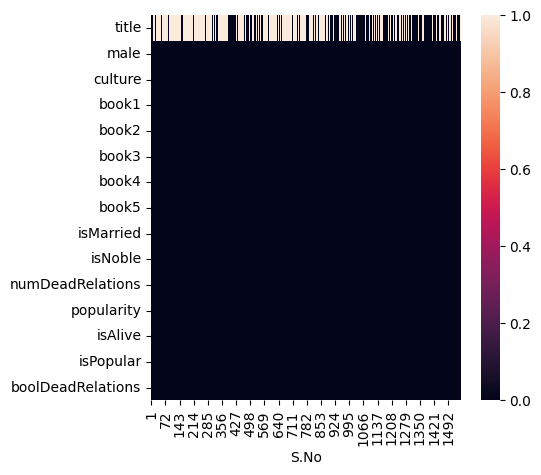

In [64]:
data.drop(columns=['age', 'name', 'dateOfBirth', 'mother', 'father', 'heir',
                 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
                 'isAliveSpouse', 'house'], inplace=True)

data_test.drop(columns=['age', 'name', 'dateOfBirth', 'mother', 'father', 'heir',
                 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir',
                 'isAliveSpouse', 'house'], inplace=True)

plt.figure(figsize=(5,5))
sns.heatmap(data.isna().transpose())

In [65]:
# работа с классом title

titles_main = ['Ser', 'Maester', 'Archmaester', 'Lord', 'Septon']

data['title'] = data['title'].where(data['title'].isin(titles_main), 'Rare')

pd.value_counts(data['title'])

C:\Users\pozoy\AppData\Local\Temp\ipykernel_20472\556701852.py:7: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['title'])


title
Rare           1166
Ser             306
Maester          29
Archmaester      21
Lord             19
Septon           16
Name: count, dtype: int64

In [66]:
titles_main = ['Ser', 'Maester', 'Archmaester', 'Lord', 'Septon']

data_test['title'] = data_test['title'].where(data_test['title'].isin(titles_main), 'Rare')

pd.value_counts(data_test['title'])

C:\Users\pozoy\AppData\Local\Temp\ipykernel_20472\131463938.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_test['title'])


title
Rare       298
Ser         78
Maester     10
Septon       2
Lord         1
Name: count, dtype: int64

In [67]:
plt.hist(data['age'])

mean_Age = np.mean(data['age'].dropna().values)
median_Age = np.quantile(data['age'].dropna().values,q=0.5)

plt.axvline(x=mean_Age, color='r', linestyle = '-', label='mean')
plt.axvline(x=median_Age, color='g', linestyle = '--', label='median')


KeyError: 'age'

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [68]:
data.columns

data_test.columns

Index(['title', 'male', 'culture', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isMarried', 'isNoble', 'numDeadRelations', 'popularity', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

In [69]:
# isAlive: жив ли персонаж в книге
# ===> целевая переменная категориальная
print(data['isAlive'].value_counts(normalize=True))

#датасет не сбалансирован

isAlive
1    0.77842
0    0.22158
Name: proportion, dtype: float64


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [71]:
# перевод категориальных признаков в числа
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

data['culture'] = label_encoding.fit_transform(data['culture'])

data['title'] = label_encoding.fit_transform(data['title'])

data.drop(columns=['numDeadRelations', 'isMarried'], inplace=True)
data.drop(columns=['popularity'], inplace=True)

KeyError: "['numDeadRelations', 'isMarried'] not found in axis"

In [73]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()

data_test['culture'] = label_encoding.fit_transform(data_test['culture'])

data_test['title'] = label_encoding.fit_transform(data_test['title'])

data_test.drop(columns=['numDeadRelations', 'isMarried'], inplace=True)
data_test.drop(columns=['popularity'], inplace=True)

data_test

KeyError: "['numDeadRelations', 'isMarried'] not found in axis"

In [74]:
# анализ количественных признаков
num_columns = ['book1','book2','book3','book4','book5', 'male', 'boolDeadRelations', 'isPopular']
num_features = data[num_columns]

num_features

,book1,book2,book3,book4,book5,male,boolDeadRelations,isPopular
S.No,,,,,,,,
1,0,0,0,0,0,1,1,1
2,1,1,1,1,1,1,1,1
3,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
1553,1,0,1,1,0,1,0,0
1554,1,1,0,0,0,0,0,0
1555,0,1,1,1,1,1,0,0


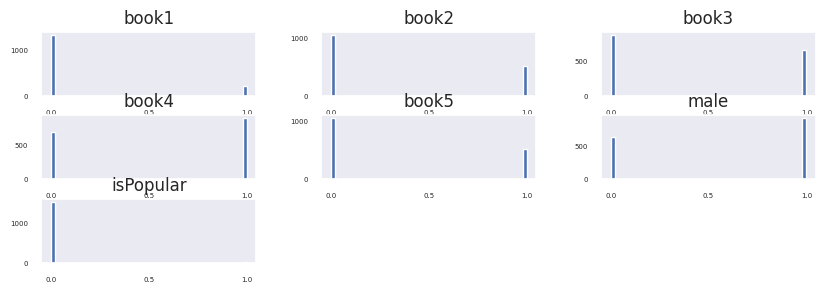

In [ ]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=5, ylabelsize=5, grid=False);

KeyboardInterrupt: 

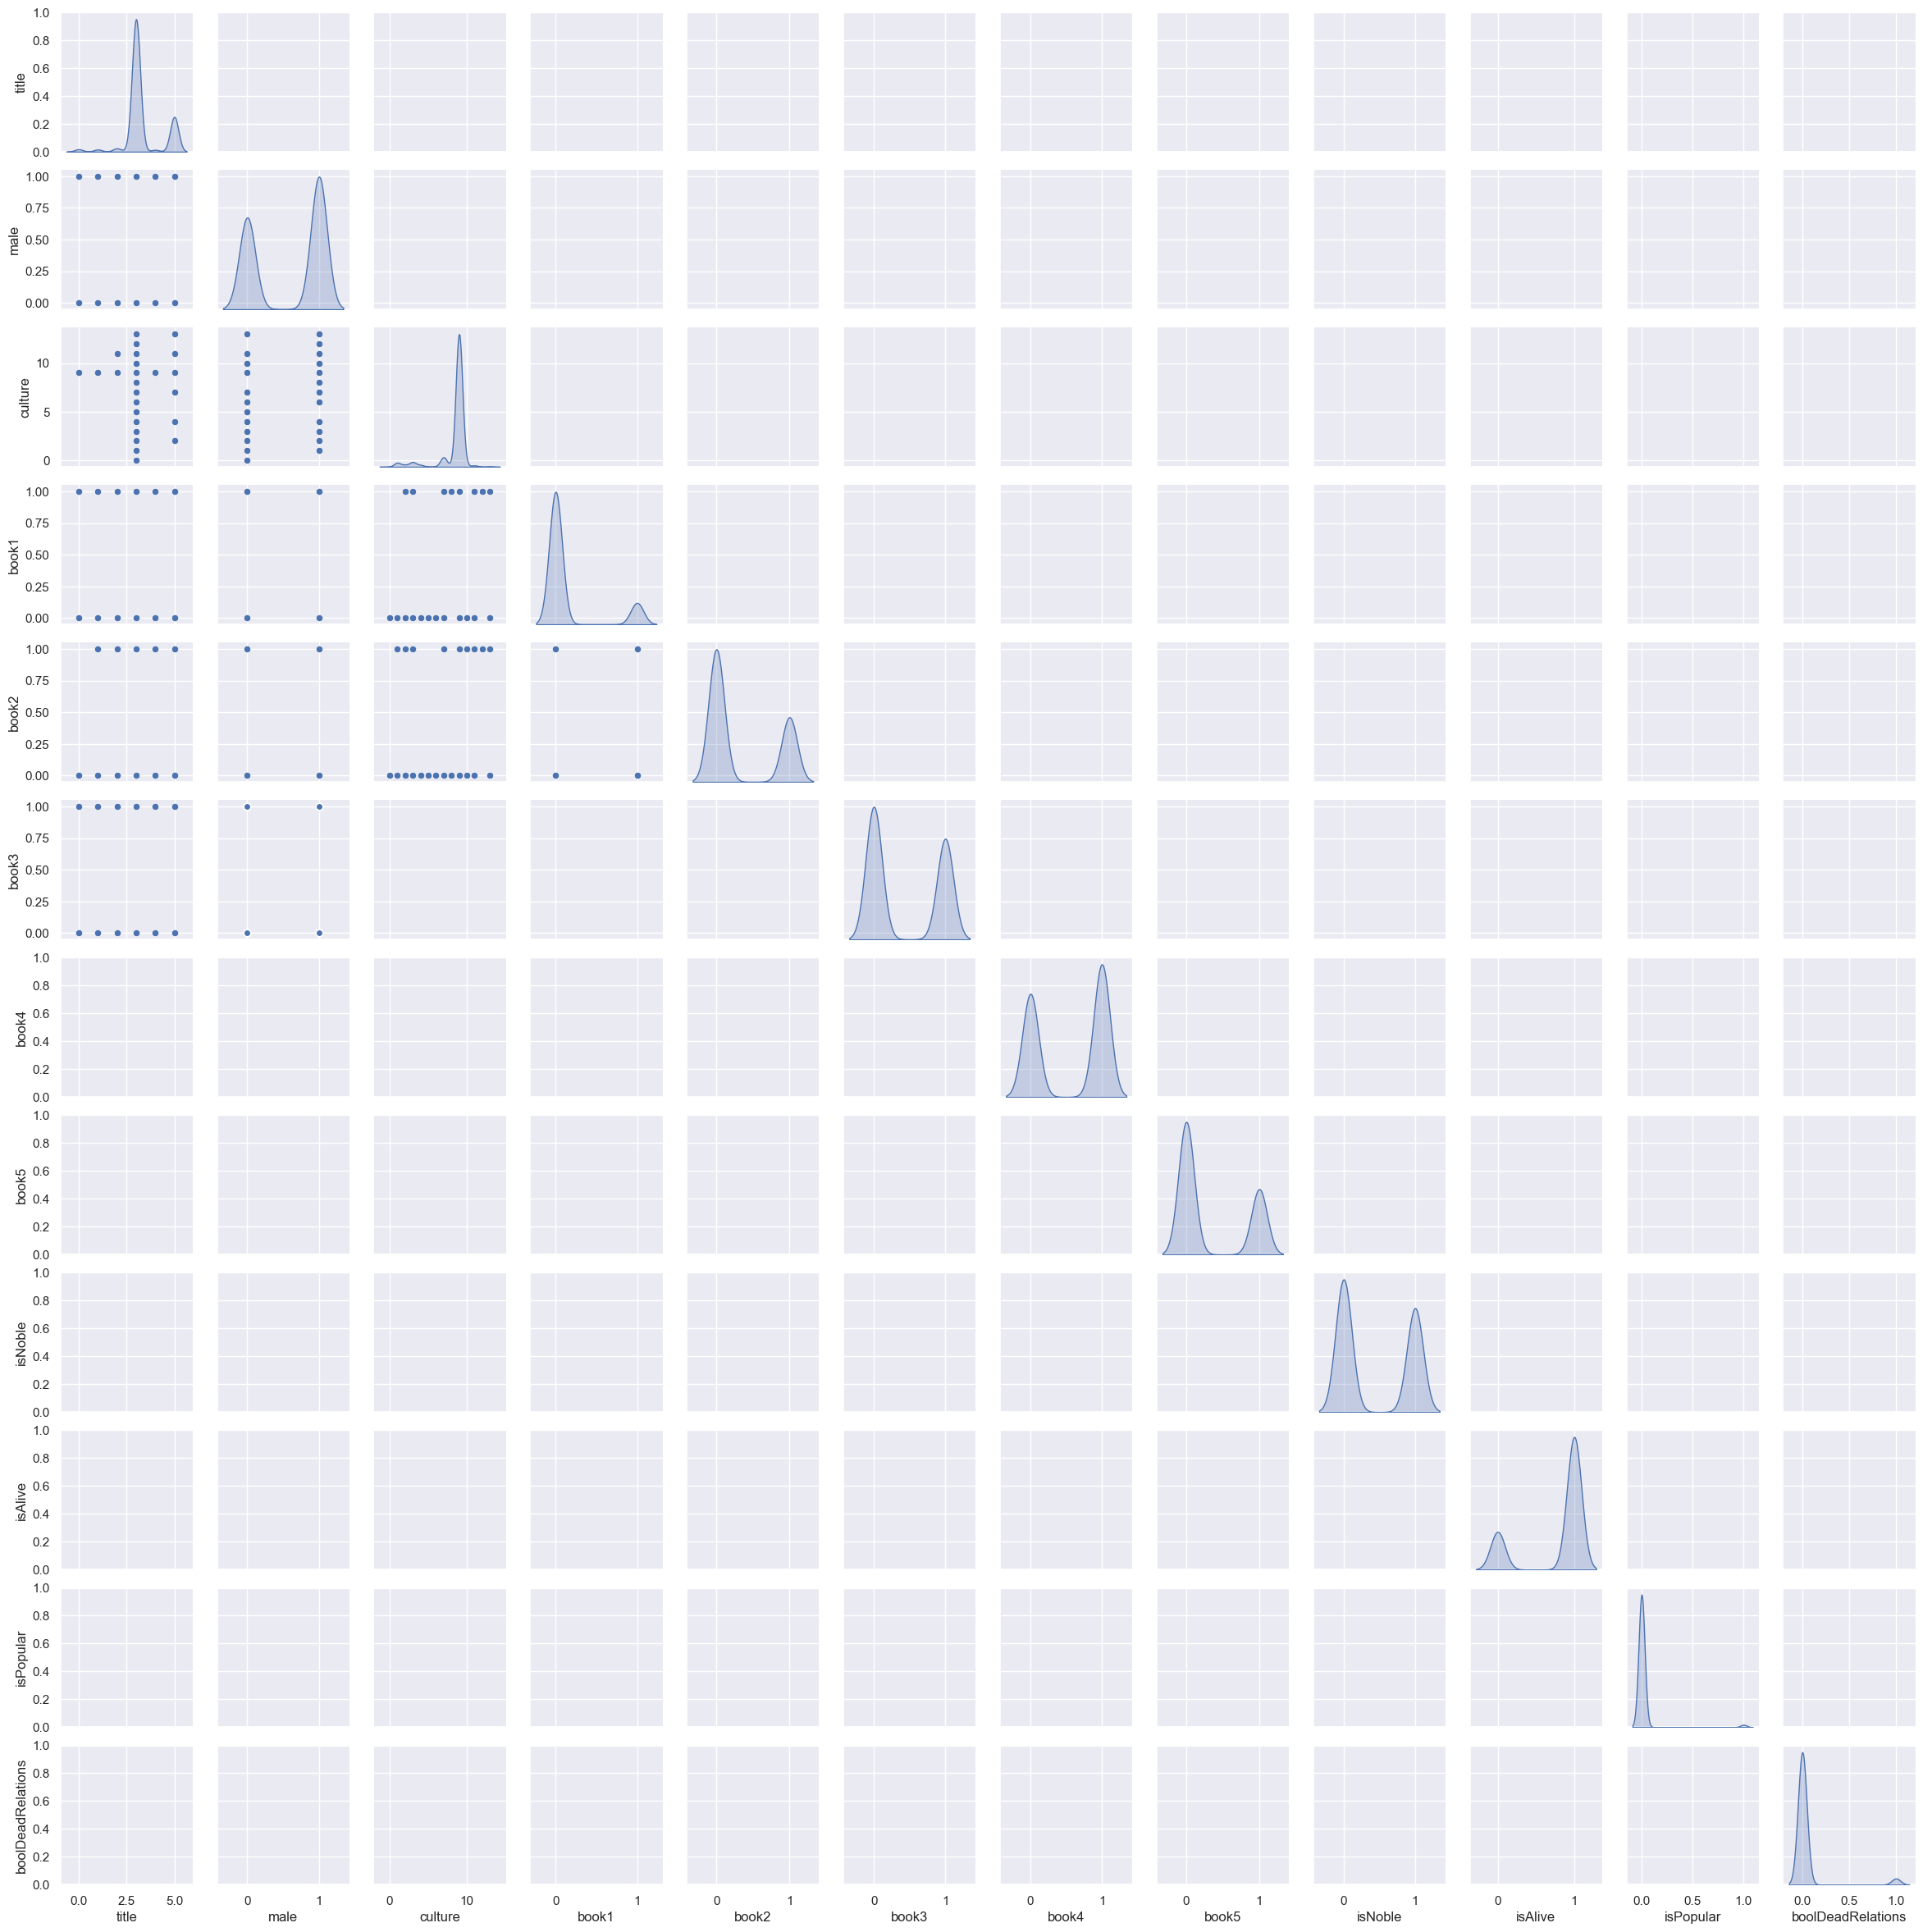

In [75]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde') # взаимные графики на куче признаков
plt.show()


**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [76]:
data['isAlive'].value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

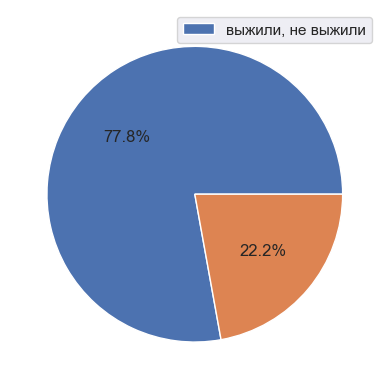

In [77]:
dataf = data['isAlive'].value_counts()

plt.pie(dataf, autopct='%1.1f%%')

plt.legend(['выжили, не выжили'])

plt.show()

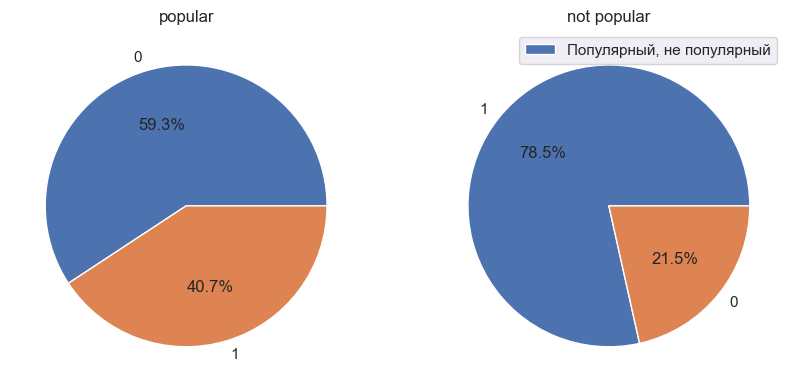

In [78]:
data1 = data[data['isPopular'] == 1]['isAlive'].value_counts()
data2 = data[data['isPopular'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title('popular')
ax2.set_title('not popular')

plt.legend(['Популярный, не популярный'])

plt.show()

# ===> не популярные персонажи умирают с большей вероятностью

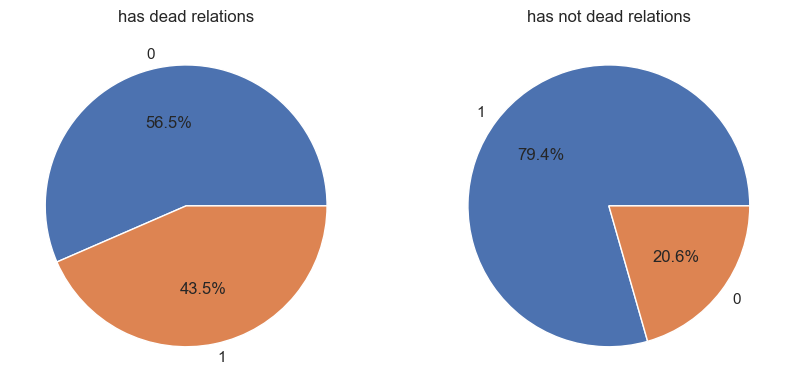

In [80]:
data1 = data[data['boolDeadRelations'] == 1]['isAlive'].value_counts()
data2 = data[data['boolDeadRelations'] == 0]['isAlive'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')

ax1.set_title('has dead relations')
ax2.set_title('has not dead relations')

plt.show()

# ===> умирают больше те, у кого нет мертвых родственников


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [88]:
X = data.drop(['isAlive'], axis=1)
y = data['isAlive']

In [89]:
y

S.No
1       0
2       1
3       1
4       0
5       1
       ..
1553    1
1554    0
1555    0
1556    1
1557    0
Name: isAlive, Length: 1557, dtype: int64

In [55]:
# # X_test = data_test.drop(columns=['isAlive']).values
# # y_test = data_test['isAlive'].values

# X_test = data_test.values

# print(X_test)
# print(X)
# print(y)

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [111]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [112]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

# Логистическая регрессия


In [113]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

# Дерево решений


In [134]:
# Шаг 1. создание модели
decision_tree = DecisionTreeClassifier(random_state=45,
                                       max_depth=4,
                                       min_samples_leaf=1,
                                        max_leaf_nodes=None)


# Шаг 2. обучение модели
decision_tree.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree.predict(X_test)

# Ближайшие соседи


In [146]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [114]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

# Проверка -- Логистическая регрессия

In [115]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8077


In [155]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import recall_score, f1_score, roc_auc_score

pred_train = logistic_regression.predict(X_train)
pred_test = logistic_regression.predict(X_test)

print('='*30)
print("MSE:", '\n')

print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')
print('='*30)

print("RMSE:", '\n')

print(f'RMSE train = {np.sqrt(mean_squared_error(y_train, pred_train))}')
print(f'RMSE test = {np.sqrt(mean_squared_error(y_test, pred_test))}')
print('='*30)

print("R2:", '\n')

print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')
print('='*30)

print("Recall:", '\n')

print(f'recall train = {recall_score(y_train, pred_train)}')
print(f'recall test = {recall_score(y_test, pred_test)}')
print('='*30)

print("F1-score:", '\n')

print(f'f1 train = {f1_score(y_train, pred_train)}')
print(f'f1 test = {f1_score(y_test, pred_test)}')
print('='*30)

print("ROC:", '\n')

print(f'ROC train = {roc_auc_score(y_train, pred_train)}')
print(f'ROC test = {roc_auc_score(y_test, pred_test)}')
print('='*30)



MSE: 

MSE train = 0.20481927710843373
MSE test = 0.19230769230769232
RMSE: 

RMSE train = 0.4525696378552518
RMSE test = 0.4385290096535146
R2: 

MAE train = 0.20481927710843373
MAE test = 0.19230769230769232
Recall: 

recall train = 0.9865841073271414
recall test = 0.9917695473251029
F1-score: 

f1 train = 0.8823257960313798
f1 test = 0.8892988929889298
ROC: 

ROC train = 0.5548862565621214
ROC test = 0.5755949185900877


Аналогичным образом посчитайте метрику accuracy для остальных моделей

# Проверка -- Дерево решений


In [135]:
# Шаг 3. Предсказание на тестовых данных
y_pred = decision_tree.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8109


In [148]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = decision_tree.predict(X_train)
pred_test = decision_tree.predict(X_test)

print('='*30, '\n')
print("MSE:", '\n')

print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')
print('='*30, '\n')

print('='*30, '\n')
print("RMSE:", '\n')

print(f'RMSE train = {np.sqrt(mean_squared_error(y_train, pred_train))}')
print(f'RMSE test = {np.sqrt(mean_squared_error(y_test, pred_test))}')
print('='*30, '\n')

print('='*30, '\n')
print("R2:", '\n')

print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')
print('='*30, '\n')


MSE: 

MSE train = 0.20240963855421687
MSE test = 0.1891025641025641


RMSE: 

RMSE train = 0.4498995871905384
RMSE test = 0.434859246311452


R2: 

MAE train = 0.20240963855421687
MAE test = 0.1891025641025641



# Проверка -- Ближайшие соседи

In [147]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7821


In [149]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

print('='*30, '\n')
print("MSE:", '\n')

print(f'MSE train = {mean_squared_error(y_train, pred_train)}')
print(f'MSE test = {mean_squared_error(y_test, pred_test)}')
print('='*30, '\n')

print('='*30, '\n')
print("RMSE:", '\n')

print(f'RMSE train = {np.sqrt(mean_squared_error(y_train, pred_train))}')
print(f'RMSE test = {np.sqrt(mean_squared_error(y_test, pred_test))}')
print('='*30, '\n')

print('='*30, '\n')
print("R2:", '\n')

print(f'MAE train = {mean_absolute_error(y_train, pred_train)}')
print(f'MAE test = {mean_absolute_error(y_test, pred_test)}')
print('='*30, '\n')


MSE: 

MSE train = 0.18072289156626506
MSE test = 0.21794871794871795


RMSE: 

RMSE train = 0.4251151509488518
RMSE test = 0.46684978092392626


R2: 

MAE train = 0.18072289156626506
MAE test = 0.21794871794871795



### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)